#Big Data Computing Project

This notebook contains the Michele Spina's (1711821) project for the cource of Big Data Computing of the a.y. 2021/22.

Before start:
Create a directory data and uploat the datesets

## Initialize pyspark

In [1]:
#install pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 64.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=5700b24e68af89fad0a49bd4840b33450a39c8397f08fd1726f5dc9a010beb9a
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
# Import libraries
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [3]:
# Create the session
conf = SparkConf().set("spark.ui.port", "4050").set('spark.executor.memory', '4G').set('spark.driver.memory', '45G').set('spark.driver.maxResultSize', '10G')

# Create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [4]:
spark

In [5]:
sc._conf.getAll()

[('spark.driver.extraJavaOptions',
  '-XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED'),
 ('spark.driver.port', '38961'),
 ('spark.driver.memory', '45G'),
 ('spark.executor.id', 'driver'),
 ('spark.sql.warehouse.dir', 'file:/content/spark-warehouse'),
 ('spark.driver.maxResultSize', '10G'),
 ('spark.app.name', 'pyspark-s

## The Dataset

For this project I choose a dataset from Kraggle about airline passeger satistation. 
The goal of this project is to predict if the passegers are satisfied or not, so I have to apply a binary prediction.

[Source](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv)



---



Now let's import the dataset and observe what it contains.

In [10]:
# Import the dataset

#from google.colab import drive
import pandas as pd

GDRIVE_DIR = "/content/gdrive" # Your own mount point on Google Drive
GDRIVE_HOME_DIR = GDRIVE_DIR + "/My Drive" # Your own home directory
GDRIVE_DATA_DIR = GDRIVE_HOME_DIR + "/BigDataComputing"
TRAIN_DATA_PATH = GDRIVE_DATA_DIR + '/train.gsheet'
TEST_DATA_PATH = GDRIVE_DATA_DIR + '/test.gsheet'

TRAIN_DATA_PATH = '/content/data/train.csv'
TEST_DATA_PATH  = '/content/data/test.csv'

#drive.mount(GDRIVE_DIR, force_remount=True)


Remember to import `test.csv` and `train.csv` inside a directory named `data` 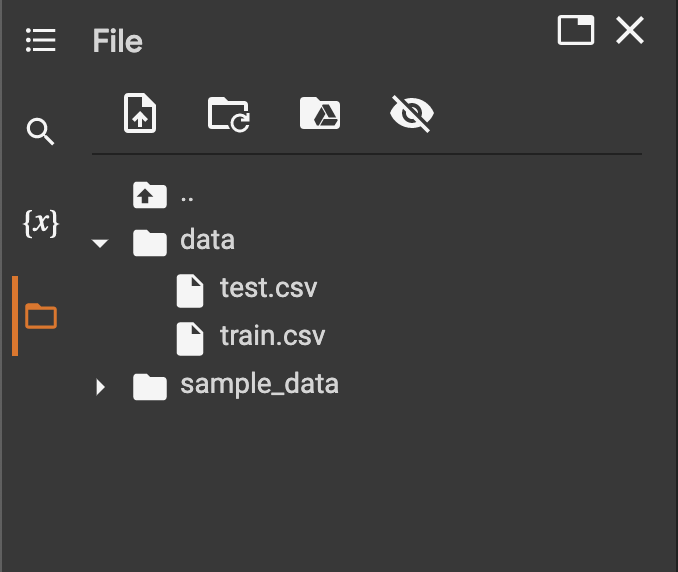

In [11]:
train_df = spark.read.load(TRAIN_DATA_PATH, 
                           format="csv", 
                           sep=",", 
                           inferSchema="true", 
                           header="true")

test_df = spark.read.load(TEST_DATA_PATH, 
                           format="csv", 
                           sep=",", 
                           inferSchema="true", 
                           header="true")

In [12]:
train_df.head()

Row(_c0=0, id=70172, Gender='Male', Customer Type='Loyal Customer', Age=13, Type of Travel='Personal Travel', Class='Eco Plus', Flight Distance=460, Inflight wifi service=3, Departure/Arrival time convenient=4, Ease of Online booking=3, Gate location=1, Food and drink=5, Online boarding=3, Seat comfort=5, Inflight entertainment=5, On-board service=4, Leg room service=3, Baggage handling=4, Checkin service=4, Inflight service=5, Cleanliness=5, Departure Delay in Minutes=25, Arrival Delay in Minutes=18.0, satisfaction='neutral or dissatisfied')

In [13]:
test_df.head()

Row(_c0=0, id=19556, Gender='Female', Customer Type='Loyal Customer', Age=52, Type of Travel='Business travel', Class='Eco', Flight Distance=160, Inflight wifi service=5, Departure/Arrival time convenient=4, Ease of Online booking=3, Gate location=4, Food and drink=3, Online boarding=4, Seat comfort=3, Inflight entertainment=5, On-board service=5, Leg room service=5, Baggage handling=5, Checkin service=2, Inflight service=5, Cleanliness=5, Departure Delay in Minutes=50, Arrival Delay in Minutes=44.0, satisfaction='satisfied')

This datase have been already cleaned, but observe the consistents of the data if fundamental practice before use a Dataset.

In [14]:
#I want to concatene test and union to observe the dataset
df = train_df.union(test_df)
df.show(n=5, truncate=False)

+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+-----------------------+
|_c0|id    |Gender|Customer Type    |Age|Type of Travel |Class   |Flight Distance|Inflight wifi service|Departure/Arrival time convenient|Ease of Online booking|Gate location|Food and drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure Delay in Minutes|Arrival Delay in Minutes|satisfaction           |
+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+---------

In [15]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Type of Travel: string (nullable = true)
 |-- Class: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Inflight wifi service: integer (nullable = true)
 |-- Departure/Arrival time convenient: integer (nullable = true)
 |-- Ease of Online booking: integer (nullable = true)
 |-- Gate location: integer (nullable = true)
 |-- Food and drink: integer (nullable = true)
 |-- Online boarding: integer (nullable = true)
 |-- Seat comfort: integer (nullable = true)
 |-- Inflight entertainment: integer (nullable = true)
 |-- On-board service: integer (nullable = true)
 |-- Leg room service: integer (nullable = true)
 |-- Baggage handling: integer (nullable = true)
 |-- Checkin service: integer (nullable = true)
 |-- Inflight service: integer (nullable = true)
 |-- Cleanline

In [16]:
print("The shape of the dataset is {:d} rows by {:d} columns".format(df.count(), len(df.columns)))

The shape of the dataset is 34986 rows by 25 columns


In [17]:
print(df.dtypes)

[('_c0', 'int'), ('id', 'int'), ('Gender', 'string'), ('Customer Type', 'string'), ('Age', 'int'), ('Type of Travel', 'string'), ('Class', 'string'), ('Flight Distance', 'int'), ('Inflight wifi service', 'int'), ('Departure/Arrival time convenient', 'int'), ('Ease of Online booking', 'int'), ('Gate location', 'int'), ('Food and drink', 'int'), ('Online boarding', 'int'), ('Seat comfort', 'int'), ('Inflight entertainment', 'int'), ('On-board service', 'int'), ('Leg room service', 'int'), ('Baggage handling', 'int'), ('Checkin service', 'int'), ('Inflight service', 'int'), ('Cleanliness', 'int'), ('Departure Delay in Minutes', 'int'), ('Arrival Delay in Minutes', 'double'), ('satisfaction', 'string')]


In [18]:
df.describe("age").show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|             34986|
|   mean| 39.54964843080089|
| stddev|15.130990396941348|
|    min|                 7|
|    max|                85|
+-------+------------------+



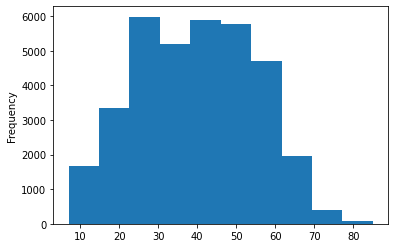

In [19]:
pan_df = df.toPandas()
pan_df.Age.plot.hist()

In [20]:
pan_df.isnull().sum()

_c0                                    0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             104
satisfaction    

In [21]:
pan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34986 entries, 0 to 34985
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _c0                                34986 non-null  int32  
 1   id                                 34986 non-null  int32  
 2   Gender                             34986 non-null  object 
 3   Customer Type                      34986 non-null  object 
 4   Age                                34986 non-null  int32  
 5   Type of Travel                     34986 non-null  object 
 6   Class                              34986 non-null  object 
 7   Flight Distance                    34986 non-null  int32  
 8   Inflight wifi service              34986 non-null  int32  
 9   Departure/Arrival time convenient  34986 non-null  int32  
 10  Ease of Online booking             34986 non-null  int32  
 11  Gate location                      34986 non-null  int

`Arrival Delay in Minutes` column contains 379 null-values. There are many differt ways to manage this inconcistent


*   Delete the inconsistent column
*   Delete the inconsistent rows
*   Substitute inconsistent using mean value
*   Substitute inconsistent using mean value adding a boolean attribute to individuate virtual values from original
*   Use linear regression to substitute inconsistent values

We'll apply the 4th options.

In [22]:
pan_df.describe()

,_c0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.00000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34882.000000
mean,10802.859572,64988.854628,39.549648,1195.033070,2.727034,3.044275,2.756474,2.974876,3.212313,3.25736,3.437861,3.350540,3.380209,3.350169,3.628423,3.306808,3.643486,3.280055,14.434631,14.861476
std,7566.507140,37546.079879,15.130990,999.557142,1.333201,1.530953,1.410116,1.281891,1.333734,1.35377,1.322180,1.339252,1.284092,1.317043,1.180077,1.270353,1.180909,1.319763,37.711690,37.882429
min,0.000000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4373.000000,32265.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,8746.000000,65174.500000,40.000000,850.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,17228.750000,97514.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


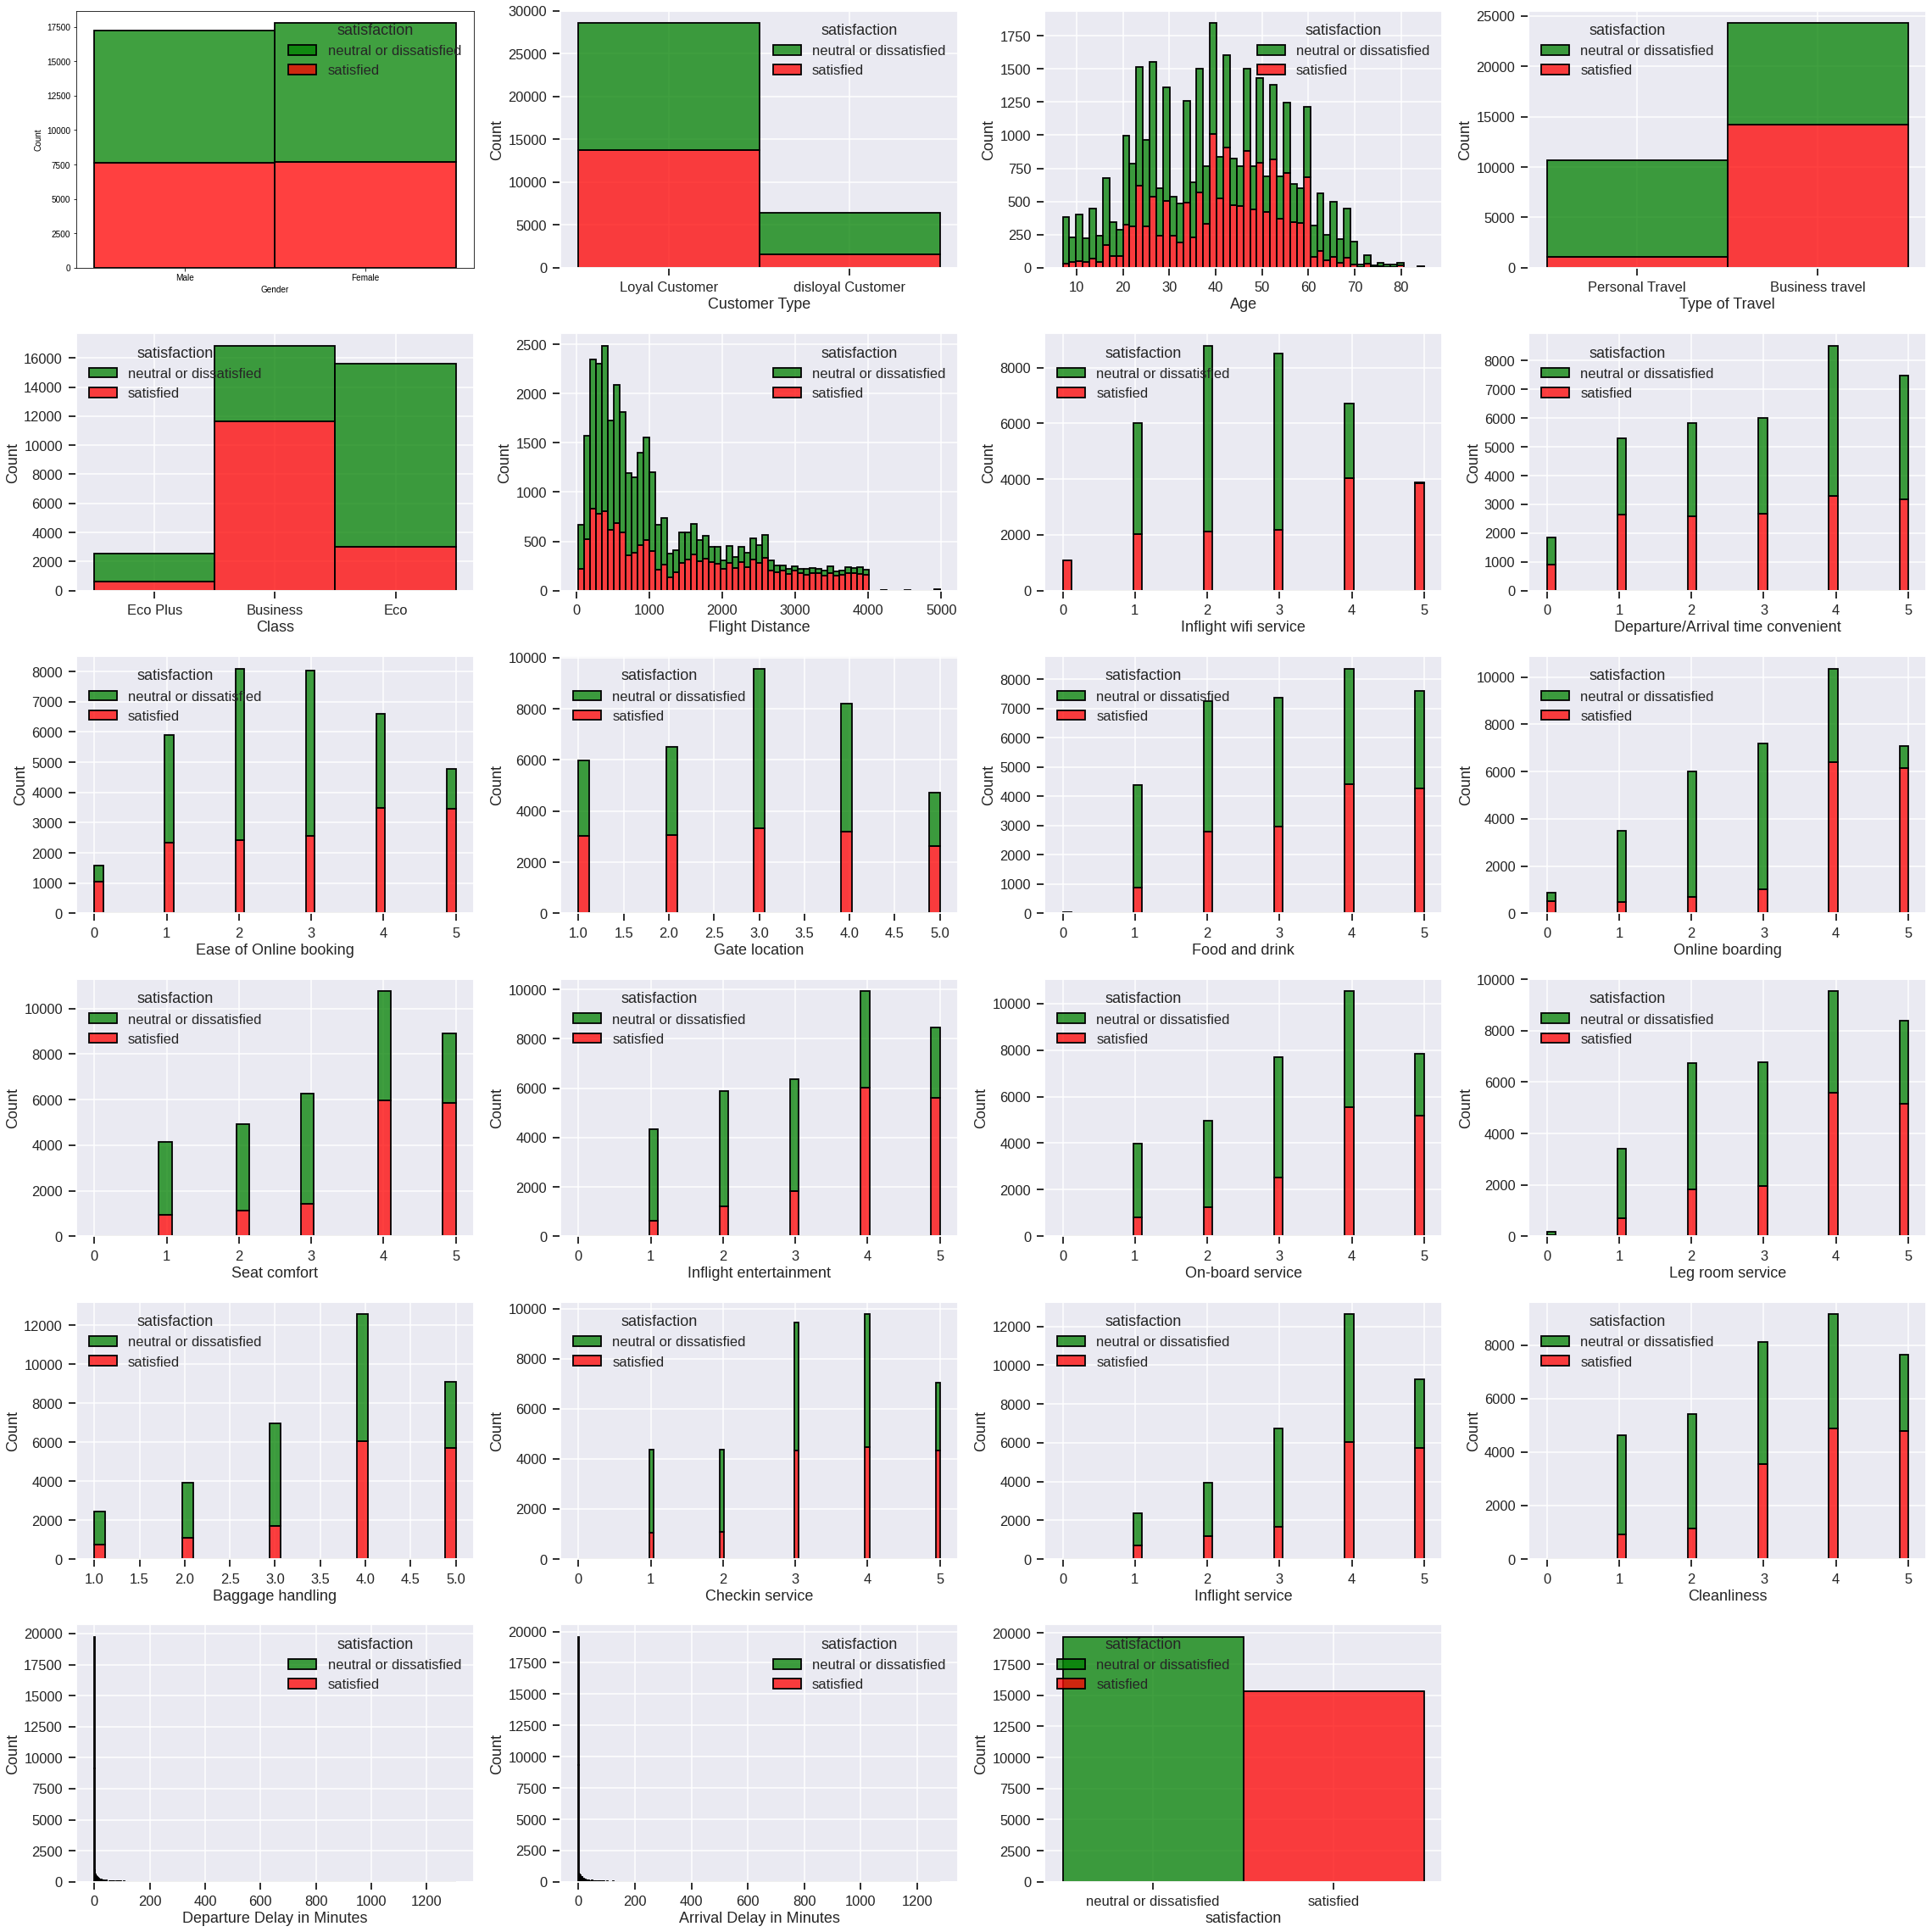

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

oe=['g','r']
fig = plt.figure(figsize=(32,32))

rows = 6
cols = 4
pos = 1

for col_name in pan_df.columns[2:]:
  plt.subplot(rows,cols,pos)
  plt.style.use('seaborn')
  plt.tight_layout()
  sns.set_context('talk')
  sns.histplot(data=pan_df, x=col_name, hue="satisfaction", linewidth = 1.8, multiple="stack",palette=oe)
  pos += 1

In [24]:
def correlation_matrix(df: DataFrame):
  fig, ax = plt.subplots(figsize=(10, 10))
  sns.heatmap(df.corr(), cmap="YlGnBu")

## Correlation Matrix

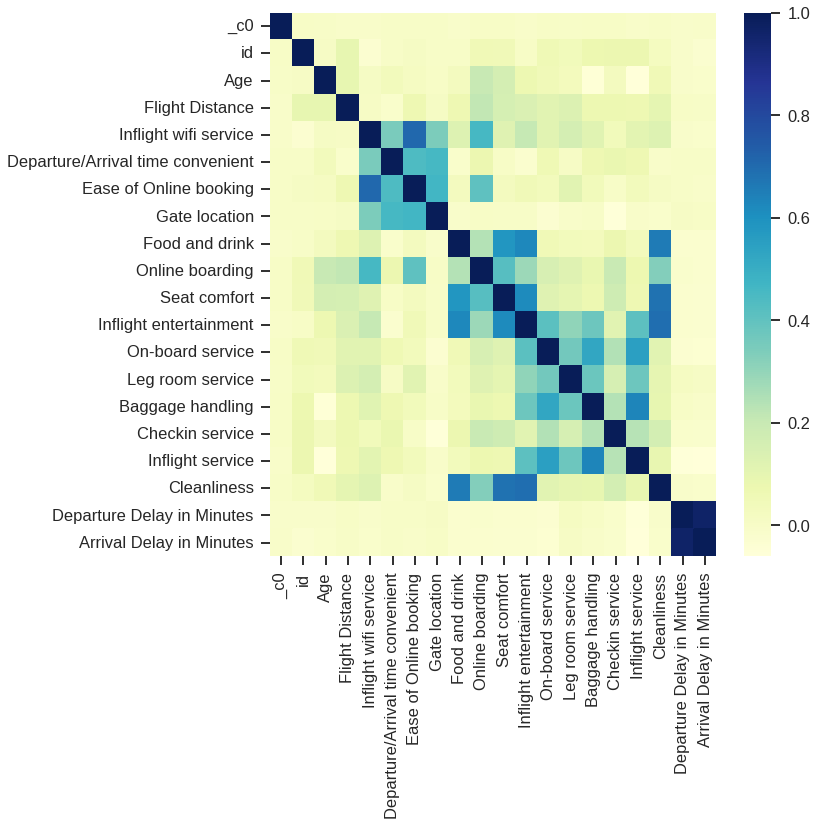

In [25]:
correlation_matrix(pan_df)

# Drop columns and rows

Drop the uselss and redondant colums 

In [26]:
COLUMNS_TO_DROP = ['_c0', 'id','Arrival Delay in Minutes']

In [27]:
COLUMNS_TO_DROP_AGAIN = ['satisfaction']

Drop also the row with null value

In [28]:
df = df.drop(*COLUMNS_TO_DROP)
df.na.drop()
#df = df.withColumn("Satisfied", col('satisfaction') == 'satisfied')
#df = df.drop('satisfaction')
df.schema 

StructType([StructField('Gender', StringType(), True), StructField('Customer Type', StringType(), True), StructField('Age', IntegerType(), True), StructField('Type of Travel', StringType(), True), StructField('Class', StringType(), True), StructField('Flight Distance', IntegerType(), True), StructField('Inflight wifi service', IntegerType(), True), StructField('Departure/Arrival time convenient', IntegerType(), True), StructField('Ease of Online booking', IntegerType(), True), StructField('Gate location', IntegerType(), True), StructField('Food and drink', IntegerType(), True), StructField('Online boarding', IntegerType(), True), StructField('Seat comfort', IntegerType(), True), StructField('Inflight entertainment', IntegerType(), True), StructField('On-board service', IntegerType(), True), StructField('Leg room service', IntegerType(), True), StructField('Baggage handling', IntegerType(), True), StructField('Checkin service', IntegerType(), True), StructField('Inflight service', Integ

# Machine Learning Models

In [29]:
df.show(n=5, truncate=False)

+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+-----------------------+
|Gender|Customer Type    |Age|Type of Travel |Class   |Flight Distance|Inflight wifi service|Departure/Arrival time convenient|Ease of Online booking|Gate location|Food and drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure Delay in Minutes|satisfaction           |
+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+-----------

#### Define the pipeline
Here I defined a general pipeline for all the models.

In particular I'll use this Pipeline:
<ul>
  <li><code>StringIndexer</code>: it encodes string column of labels to a column of label indices;</li>
  <li><code>OneHotEncoder</code>: it maps a categorical feature (represented as a lable index) to a binary vector with at most a single one-value indicating the presence of a specific feature value from among the set of all feature values;</li>
  <li><code>VectorAssembler</code>: it is a transformer that combines a given list of columns into a single vector column;</li>
  <li><code>StandardScaler</code>: it transforms a dataset of <code>Vector</code> rows, normalizing each feature to have unit standard deviation and/or zero mean;</li>
  <li><code>MODEL</code>: the model to train that could be the <code>Logistic Regression, Decision Tree or Random Forest</code>.</li>
</ul>

In [30]:
from typing import List, Callable
def general_pipeline(df: DataFrame, numerical_features: List[str], categorical_features: List[str], target_variable: str, with_std: bool = True, with_mean: bool = True, scaler: bool = False):
  from pyspark.ml import Pipeline
  from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
  
  indexers = [StringIndexer(inputCol=c, outputCol="{}_indexed".format(c), handleInvalid="skip") for c in categorical_features]
  
  encoder = OneHotEncoder(inputCols=[indexer.getOutputCol() for indexer in indexers], outputCols=["{}_encoded".format(indexer.getOutputCol()) for indexer in indexers], handleInvalid="keep")
  
  label_indexer = StringIndexer(inputCol=target_variable, outputCol="label", handleInvalid="skip")
  
  assembler = VectorAssembler(inputCols=encoder.getOutputCols() + numerical_features, outputCol="features")
  
  if scaler:
    scaler_vect = StandardScaler(inputCol=assembler.getOutputCol(), outputCol="std_"+assembler.getOutputCol(), withStd=with_std, withMean=with_mean)
    stages = indexers + [encoder] + [label_indexer] + [assembler] + [scaler_vect]
  else:
    stages = indexers + [encoder] + [label_indexer] + [assembler]
    
  pipeline = Pipeline(stages=stages)
  transformer = pipeline.fit(df)
  df_transformed = transformer.transform(df)
  return transformer, df_transformed

In [31]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [32]:
CATEGORICAL_FEATURES = ['Gender', 'Customer Type', 'Class', 'Type of Travel'] # they are the CATEGORICAL FEATURES
NUMERICAL_FEATURES = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes']

<code>plot_recision_recall, plot_coefficients, plot_roc, plot_confusion_matrix, calculate_metrics, metrics_calculation</code> are utility functions.

In [33]:
def plot_precision_recall(model):
  training_summary = model.summary
  precision_recall = training_summary.pr.toPandas()
  fig, ax = plt.subplots(1, 1, figsize=(8,6))
  _ = sns.lineplot(x=precision_recall['recall'], y=precision_recall['precision'], marker="s", axes=ax)
  _ = ax.set_xlabel("Recall", labelpad=20)
  _ = ax.set_ylabel("Precision", labelpad=20)
  _ = ax.set_title("Precision vs. Recall")

In [34]:
import numpy as np
def plot_coefficients(model):
  theta = np.sort(model.coefficients)
  fig, ax = plt.subplots(1, 1, figsize=(8,6))
  _ = sns.lineplot(x=range(0,len(model.coefficients)), y=theta, marker="o", axes=ax)
  _ = ax.set_xlabel("Theta Index", labelpad=20)
  _ = ax.set_ylabel("Theta Value (log odds)", labelpad=20)

In [35]:
def plot_roc(model):
  roc = model.summary.roc.toPandas()

  fig, ax = plt.subplots(1, 1, figsize=(8,6))
  _ = sns.lineplot(x=roc['FPR'], y=roc['TPR'], marker="s", axes=ax)
  _ = ax.set_xlabel("False Positive Rate", labelpad=20)
  _ = ax.set_ylabel("True Positive Rate", labelpad=20)
  _ = ax.set_title("ROC Curve")
  print('Training Set Accuracy: {:.3f}'.format(model.summary.areaUnderROC))

In [36]:
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without normalization")
  
  print(cm)
  
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [37]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, mean_squared_error, mean_absolute_error, r2_score

def calculate_metrics(predictions):
  y_true = predictions.select("label")
  y_true = y_true.toPandas()

  y_pred = predictions.select("prediction")
  y_pred = y_pred.toPandas()

  confusion_matrix_lr = confusion_matrix(y_true, y_pred, labels=[0.0, 1.0])
  plt.figure()
  plot_confusion_matrix(confusion_matrix_lr, classes=[0.0, 1.0], title='Confusion matrix lr')
  plt.show()

In [38]:

def metrics_calculation(y_test, pred):
  precision = precision_score(y_test, pred, average = "macro")
  recall = recall_score(y_test, pred, average = "macro")
  accuracy = accuracy_score(y_test, pred)
  f1score = (2 * (precision * recall))/(precision + recall)
  print('Precision metric: {}'.format(precision))
  print('Recall Metric: {}'.format(recall))
  print('Accuracy Metric: {}'.format(accuracy))
  print('F1-score Metric: {}'.format(f1score))
  

In the cell below there is the code to run the experiments that are present in the experiments dictionary.

In [39]:
print(df.columns)

['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'satisfaction']


In [40]:
transformer, transformed = general_pipeline(df, NUMERICAL_FEATURES, CATEGORICAL_FEATURES, 'satisfaction', scaler = True)
train_df, test_df = transformed.randomSplit([0.7, 0.3])

## Binomial Logistic regression
Show the results for binomial logistic regression experiments (loading the previous models)

In [41]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression()

lrmodel = lr.fit(train_df)

output = lrmodel.transform(test_df)

print(output)


DataFrame[Gender: string, Customer Type: string, Age: int, Type of Travel: string, Class: string, Flight Distance: int, Inflight wifi service: int, Departure/Arrival time convenient: int, Ease of Online booking: int, Gate location: int, Food and drink: int, Online boarding: int, Seat comfort: int, Inflight entertainment: int, On-board service: int, Leg room service: int, Baggage handling: int, Checkin service: int, Inflight service: int, Cleanliness: int, Departure Delay in Minutes: int, satisfaction: string, Gender_indexed: double, Customer Type_indexed: double, Class_indexed: double, Type of Travel_indexed: double, Gender_indexed_encoded: vector, Customer Type_indexed_encoded: vector, Class_indexed_encoded: vector, Type of Travel_indexed_encoded: vector, label: double, features: vector, std_features: vector, rawPrediction: vector, probability: vector, prediction: double]


Confusion matrix without normalization
[[5301  602]
 [ 757 3822]]


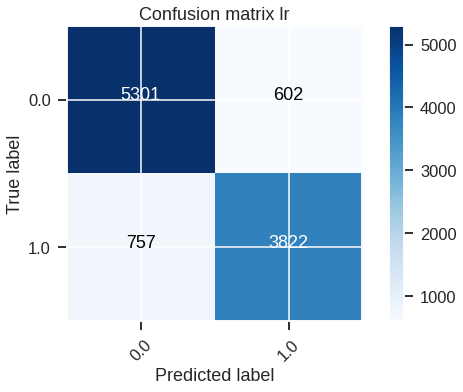

In [42]:
calculate_metrics(output)

In [43]:
metrics_calculation(output.select("label").toPandas(), output.select("prediction").toPandas())

Precision metric: 0.8694826591890209
Recall Metric: 0.8663490090598771
Accuracy Metric: 0.8703491700057241
F1-score Metric: 0.8679130055773866


Training Set Accuracy: 0.926


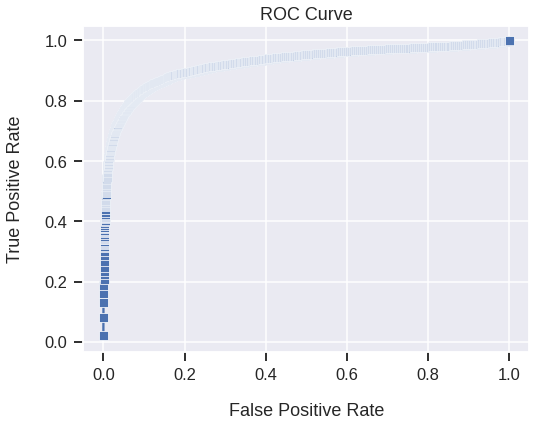

In [44]:
plot_roc(lrmodel)

In [45]:
evaluator = BinaryClassificationEvaluator()
print('Test Set AUC: {:.3f}'.format(evaluator.evaluate(output)))

Test Set AUC: 0.925


## Decision Tree

In [46]:
from pyspark.ml.classification import DecisionTreeClassifier

lr = DecisionTreeClassifier()

lrmodel = lr.fit(train_df)

output = lrmodel.transform(test_df)

print(output)


DataFrame[Gender: string, Customer Type: string, Age: int, Type of Travel: string, Class: string, Flight Distance: int, Inflight wifi service: int, Departure/Arrival time convenient: int, Ease of Online booking: int, Gate location: int, Food and drink: int, Online boarding: int, Seat comfort: int, Inflight entertainment: int, On-board service: int, Leg room service: int, Baggage handling: int, Checkin service: int, Inflight service: int, Cleanliness: int, Departure Delay in Minutes: int, satisfaction: string, Gender_indexed: double, Customer Type_indexed: double, Class_indexed: double, Type of Travel_indexed: double, Gender_indexed_encoded: vector, Customer Type_indexed_encoded: vector, Class_indexed_encoded: vector, Type of Travel_indexed_encoded: vector, label: double, features: vector, std_features: vector, rawPrediction: vector, probability: vector, prediction: double]


Confusion matrix without normalization
[[5521  382]
 [ 611 3968]]


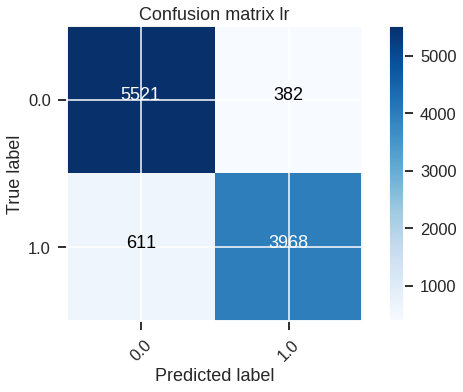

In [47]:
calculate_metrics(output)

In [48]:
metrics_calculation(output.select("label").toPandas(), output.select("prediction").toPandas())

Precision metric: 0.906271340846211
Recall Metric: 0.9009259471302028
Accuracy Metric: 0.905266170578134
F1-score Metric: 0.9035907385884563


In [49]:
evaluator = BinaryClassificationEvaluator()
print('Test Set AUC: {:.3f}'.format(evaluator.evaluate(output)))

Test Set AUC: 0.752


## Random Forest

In [50]:
from pyspark.ml.classification import RandomForestClassifier

lr = RandomForestClassifier()

lrmodel = lr.fit(train_df)

output = lrmodel.transform(test_df)

print(output)


DataFrame[Gender: string, Customer Type: string, Age: int, Type of Travel: string, Class: string, Flight Distance: int, Inflight wifi service: int, Departure/Arrival time convenient: int, Ease of Online booking: int, Gate location: int, Food and drink: int, Online boarding: int, Seat comfort: int, Inflight entertainment: int, On-board service: int, Leg room service: int, Baggage handling: int, Checkin service: int, Inflight service: int, Cleanliness: int, Departure Delay in Minutes: int, satisfaction: string, Gender_indexed: double, Customer Type_indexed: double, Class_indexed: double, Type of Travel_indexed: double, Gender_indexed_encoded: vector, Customer Type_indexed_encoded: vector, Class_indexed_encoded: vector, Type of Travel_indexed_encoded: vector, label: double, features: vector, std_features: vector, rawPrediction: vector, probability: vector, prediction: double]


Confusion matrix without normalization
[[5510  393]
 [ 465 4114]]


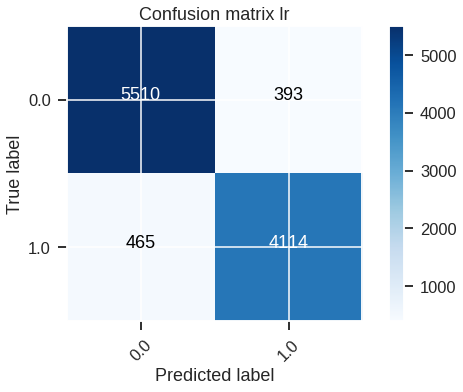

In [51]:
calculate_metrics(output)

In [52]:
metrics_calculation(output.select("label").toPandas(), output.select("prediction").toPandas())

Precision metric: 0.9174890198696031
Recall Metric: 0.9159365629914824
Accuracy Metric: 0.9181453921007441
F1-score Metric: 0.9167121341575176


Training Set Accuracy: 0.972


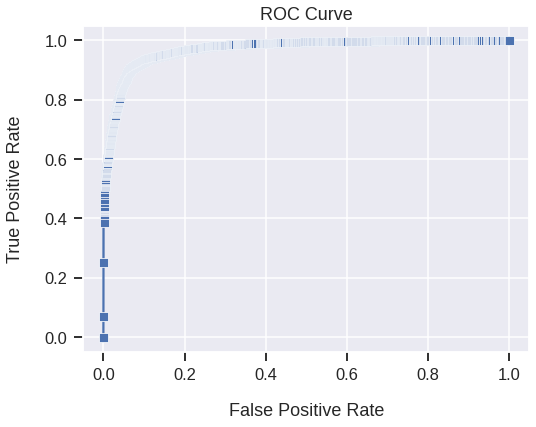

In [53]:
plot_roc(lrmodel)

In [54]:
evaluator = BinaryClassificationEvaluator()
print('Test Set AUC: {:.3f}'.format(evaluator.evaluate(output)))

Test Set AUC: 0.972


#Hyper-tuning

In [55]:
train_df, test_df = df.randomSplit([0.7, 0.3])

## Logistic Regression

In [ ]:
def matrix_factorization(train, k_fold=5):

    from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
    from pyspark.ml.evaluation import RegressionEvaluator
    from pyspark.ml import Pipeline
    from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler


    indexers = [StringIndexer(inputCol=c, outputCol="{}_indexed".format(c), handleInvalid="skip") for c in CATEGORICAL_FEATURES]
    
    encoder = OneHotEncoder(inputCols=[indexer.getOutputCol() for indexer in indexers], outputCols=["{}_encoded".format(indexer.getOutputCol()) for indexer in indexers], handleInvalid="keep")
    
    label_indexer = StringIndexer(inputCol='satisfaction', outputCol="label", handleInvalid="skip")
    
    assembler = VectorAssembler(inputCols=encoder.getOutputCols() + NUMERICAL_FEATURES, outputCol="features")
    
    classifier = LogisticRegression()

    scaler_vect = StandardScaler(inputCol=assembler.getOutputCol(), outputCol="std_"+assembler.getOutputCol(), withStd=True, withMean=True)
    stages = indexers + [encoder] + [label_indexer] + [assembler] + [scaler_vect] + [classifier]    
      
    pipeline = Pipeline(stages=stages)
    '''    
    if target_variable != "label":
        df = df.withColumnRenamed(target_variable, "label")
    '''

    param_grid = ParamGridBuilder()\
        .addGrid(classifier.maxIter, [10, 100, 1000]) \
        .addGrid(classifier.regParam, [0.0, 0.05, 0.1]) \
        .addGrid(classifier.elasticNetParam, [0.0, 0.5, 1.0]) \
        .build()
    
    cross_val = CrossValidator(estimator=pipeline, 
                               estimatorParamMaps=param_grid,
                               evaluator=BinaryClassificationEvaluator(metricName="areaUnderROC"),
                               numFolds=k_fold,
                               collectSubModels=True # this flag allows us to store ALL the models trained during k-fold cross validation
                               )

    # Run cross-validation, and choose the best set of parameters.
    cv_model = cross_val.fit(train)

    return cv_model

In [ ]:
tdf = train_df
cv_model_lr = matrix_factorization(tdf)

In [ ]:
def summarize_all_models(cv_models):
    for k, models in enumerate(cv_models):
        print("*************** Fold #{:d} ***************\n".format(k+1))
        for i, m in enumerate(models):
            print("--- Model #{:d} out of {:d} ---".format(i+1, len(models)))
            print("\tParameters: lambda=[{:.3f}]; alpha=[{:.3f}] ".format(m.stages[-1]._java_obj.getRegParam(), m.stages[-1]._java_obj.getElasticNetParam()))
            print("\tModel summary: {}\n".format(m.stages[-1]))
        print("***************************************\n")

In [ ]:
summarize_all_models(cv_model_lr.subModels)


for i, avg_roc_auc in enumerate(cv_model_lr.avgMetrics):
    print("Avg. ROC AUC computed across k-fold cross validation for model setting #{:d}: {:.3f}".format(i+1, avg_roc_auc))

*************** Fold #1 ***************

--- Model #1 out of 27 ---
	Parameters: lambda=[0.000]; alpha=[0.000] 
	Model summary: LogisticRegressionModel: uid=LogisticRegression_6cb8d8edefab, numClasses=2, numFeatures=26

--- Model #2 out of 27 ---
	Parameters: lambda=[0.000]; alpha=[0.500] 
	Model summary: LogisticRegressionModel: uid=LogisticRegression_6cb8d8edefab, numClasses=2, numFeatures=26

--- Model #3 out of 27 ---
	Parameters: lambda=[0.000]; alpha=[1.000] 
	Model summary: LogisticRegressionModel: uid=LogisticRegression_6cb8d8edefab, numClasses=2, numFeatures=26

--- Model #4 out of 27 ---
	Parameters: lambda=[0.050]; alpha=[0.000] 
	Model summary: LogisticRegressionModel: uid=LogisticRegression_6cb8d8edefab, numClasses=2, numFeatures=26

--- Model #5 out of 27 ---
	Parameters: lambda=[0.050]; alpha=[0.500] 
	Model summary: LogisticRegressionModel: uid=LogisticRegression_6cb8d8edefab, numClasses=2, numFeatures=26

--- Model #6 out of 27 ---
	Parameters: lambda=[0.050]; alpha=[1

In [ ]:
print("Best model according to k-fold cross validation: lambda=[{:.3f}]; alfa=[{:.3f}]; maxiter=[{:.3f}]".
      format(cv_model_lr.bestModel.stages[-1]._java_obj.getRegParam(), 
             cv_model_lr.bestModel.stages[-1]._java_obj.getElasticNetParam(),
             cv_model_lr.bestModel.stages[-1]._java_obj.getMaxIter(),
             )
      )
print(cv_model_lr.bestModel.stages[-1])

Best model according to k-fold cross validation: lambda=[0.000]; alfa=[0.000]; maxiter=[1000.000]
LogisticRegressionModel: uid=LogisticRegression_6cb8d8edefab, numClasses=2, numFeatures=26


In [ ]:
predictions = cv_model_lr.bestModel.transform(test_df)
metrics_calculation(predictions.select("label").toPandas(), predictions.select("prediction").toPandas())


Precision metric: 0.8681172167405448
Recall Metric: 0.8635550701145406
Accuracy Metric: 0.8683661205642356
F1-score Metric: 0.8658301338661507


## Random Forest

In [56]:
def matrix_factorization(train, k_fold=5):

    from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
    from pyspark.ml.evaluation import RegressionEvaluator
    from pyspark.ml import Pipeline
    from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler


    indexers = [StringIndexer(inputCol=c, outputCol="{}_indexed".format(c), handleInvalid="skip") for c in CATEGORICAL_FEATURES]
    
    encoder = OneHotEncoder(inputCols=[indexer.getOutputCol() for indexer in indexers], outputCols=["{}_encoded".format(indexer.getOutputCol()) for indexer in indexers], handleInvalid="keep")
    
    label_indexer = StringIndexer(inputCol='satisfaction', outputCol="label", handleInvalid="skip")
    
    assembler = VectorAssembler(inputCols=encoder.getOutputCols() + NUMERICAL_FEATURES, outputCol="features")
    
    classifier = RandomForestClassifier()

    scaler_vect = StandardScaler(inputCol=assembler.getOutputCol(), outputCol="std_"+assembler.getOutputCol(), withStd=True, withMean=True)
    stages = indexers + [encoder] + [label_indexer] + [assembler] + [scaler_vect] + [classifier]    
      
    pipeline = Pipeline(stages=stages)
    '''    
    if target_variable != "label":
        df = df.withColumnRenamed(target_variable, "label")
    '''

    param_grid = ParamGridBuilder()\
        .addGrid(classifier.maxDepth, [3, 5, 8]) \
        .addGrid(classifier.numTrees, [10, 50, 100]) \
        .build()
    
    cross_val = CrossValidator(estimator=pipeline, 
                               estimatorParamMaps=param_grid,
                               evaluator=BinaryClassificationEvaluator(metricName="areaUnderROC"),
                               numFolds=k_fold,
                               collectSubModels=True # this flag allows us to store ALL the models trained during k-fold cross validation
                               )

    # Run cross-validation, and choose the best set of parameters.
    cv_model = cross_val.fit(train)

    return cv_model

In [57]:
tdf = train_df
cv_model_rf = matrix_factorization(train_df)

In [58]:
def summarize_all_models(cv_models):
    for k, models in enumerate(cv_models):
        print("*************** Fold #{:d} ***************\n".format(k+1))
        for i, m in enumerate(models):
            print("--- Model #{:d} out of {:d} ---".format(i+1, len(models)))
            print("\tParameters: maxDepth=[{:.3f}]; numTrees=[{:.3f}] ".format(m.stages[-1]._java_obj.getMaxDepth(), m.stages[-1]._java_obj.getNumTrees()))
            print("\tModel summary: {}\n".format(m.stages[-1]))
        print("***************************************\n")

In [59]:
summarize_all_models(cv_model_rf.subModels)


for i, avg_roc_auc in enumerate(cv_model_rf.avgMetrics):
    print("Avg. ROC AUC computed across k-fold cross validation for model setting #{:d}: {:.3f}".format(i+1, avg_roc_auc))

*************** Fold #1 ***************

--- Model #1 out of 9 ---
	Parameters: maxDepth=[3.000]; numTrees=[10.000] 
	Model summary: RandomForestClassificationModel: uid=RandomForestClassifier_5d5f935f408c, numTrees=10, numClasses=2, numFeatures=26

--- Model #2 out of 9 ---
	Parameters: maxDepth=[3.000]; numTrees=[50.000] 
	Model summary: RandomForestClassificationModel: uid=RandomForestClassifier_5d5f935f408c, numTrees=50, numClasses=2, numFeatures=26

--- Model #3 out of 9 ---
	Parameters: maxDepth=[3.000]; numTrees=[100.000] 
	Model summary: RandomForestClassificationModel: uid=RandomForestClassifier_5d5f935f408c, numTrees=100, numClasses=2, numFeatures=26

--- Model #4 out of 9 ---
	Parameters: maxDepth=[5.000]; numTrees=[10.000] 
	Model summary: RandomForestClassificationModel: uid=RandomForestClassifier_5d5f935f408c, numTrees=10, numClasses=2, numFeatures=26

--- Model #5 out of 9 ---
	Parameters: maxDepth=[5.000]; numTrees=[50.000] 
	Model summary: RandomForestClassificationMod

In [60]:
print("Best model according to k-fold cross validation: maxDepth=[{:.3f}]; numTrees=[{:.3f}]".
      format(cv_model_rf.bestModel.stages[-1]._java_obj.getMaxDepth(), 
             cv_model_rf.bestModel.stages[-1]._java_obj.getNumTrees(),
             )
      )
print(cv_model_rf.bestModel.stages[-1])

Best model according to k-fold cross validation: maxDepth=[8.000]; numTrees=[100.000]
RandomForestClassificationModel: uid=RandomForestClassifier_5d5f935f408c, numTrees=100, numClasses=2, numFeatures=26


In [62]:
predictions = cv_model_rf.bestModel.transform(test_df)
metrics_calculation(predictions.select("label").toPandas(), predictions.select("prediction").toPandas())

Precision metric: 0.9401752739484504
Recall Metric: 0.9393897574745801
Accuracy Metric: 0.9408801444729589
F1-score Metric: 0.9397823515681842


## Decison Tree

In [63]:
def matrix_factorization(train, k_fold=5):

    from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
    from pyspark.ml.evaluation import RegressionEvaluator
    from pyspark.ml import Pipeline
    from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler


    indexers = [StringIndexer(inputCol=c, outputCol="{}_indexed".format(c), handleInvalid="skip") for c in CATEGORICAL_FEATURES]
    
    encoder = OneHotEncoder(inputCols=[indexer.getOutputCol() for indexer in indexers], outputCols=["{}_encoded".format(indexer.getOutputCol()) for indexer in indexers], handleInvalid="keep")
    
    label_indexer = StringIndexer(inputCol='satisfaction', outputCol="label", handleInvalid="skip")
    
    assembler = VectorAssembler(inputCols=encoder.getOutputCols() + NUMERICAL_FEATURES, outputCol="features")
    
    classifier = DecisionTreeClassifier()

    scaler_vect = StandardScaler(inputCol=assembler.getOutputCol(), outputCol="std_"+assembler.getOutputCol(), withStd=True, withMean=True)
    stages = indexers + [encoder] + [label_indexer] + [assembler] + [scaler_vect] + [classifier]    
      
    pipeline = Pipeline(stages=stages)
    '''    
    if target_variable != "label":
        df = df.withColumnRenamed(target_variable, "label")
    '''

    param_grid = ParamGridBuilder()\
        .addGrid(classifier.maxDepth, [3, 5, 8]) \
        .addGrid(classifier.impurity, ["gini", "entropy"]) \
        .build()
    
    cross_val = CrossValidator(estimator=pipeline, 
                               estimatorParamMaps=param_grid,
                               evaluator=BinaryClassificationEvaluator(metricName="areaUnderROC"),
                               numFolds=k_fold,
                               collectSubModels=True # this flag allows us to store ALL the models trained during k-fold cross validation
                               )

    # Run cross-validation, and choose the best set of parameters.
    cv_model = cross_val.fit(train)

    return cv_model

In [64]:
cv_model_dt = matrix_factorization(train_df)

In [65]:
def summarize_all_models(cv_models):
    for k, models in enumerate(cv_models):
        print("*************** Fold #{:d} ***************\n".format(k+1))
        for i, m in enumerate(models):
            print("--- Model #{:d} out of {:d} ---".format(i+1, len(models)))
            print("\tParameters: maxDepth=[{:.3f}]; impurity=[{:s}] ".format(m.stages[-1]._java_obj.getMaxDepth(), m.stages[-1]._java_obj.getImpurity()))
            print("\tModel summary: {}\n".format(m.stages[-1]))
        print("***************************************\n")

In [66]:
summarize_all_models(cv_model_dt.subModels)


for i, avg_roc_auc in enumerate(cv_model_dt.avgMetrics):
    print("Avg. ROC AUC computed across k-fold cross validation for model setting #{:d}: {:.3f}".format(i+1, avg_roc_auc))

*************** Fold #1 ***************

--- Model #1 out of 6 ---
	Parameters: maxDepth=[3.000]; impurity=[gini] 
	Model summary: DecisionTreeClassificationModel: uid=DecisionTreeClassifier_5963fc4a1eb6, depth=3, numNodes=13, numClasses=2, numFeatures=26

--- Model #2 out of 6 ---
	Parameters: maxDepth=[3.000]; impurity=[entropy] 
	Model summary: DecisionTreeClassificationModel: uid=DecisionTreeClassifier_5963fc4a1eb6, depth=3, numNodes=13, numClasses=2, numFeatures=26

--- Model #3 out of 6 ---
	Parameters: maxDepth=[5.000]; impurity=[gini] 
	Model summary: DecisionTreeClassificationModel: uid=DecisionTreeClassifier_5963fc4a1eb6, depth=5, numNodes=33, numClasses=2, numFeatures=26

--- Model #4 out of 6 ---
	Parameters: maxDepth=[5.000]; impurity=[entropy] 
	Model summary: DecisionTreeClassificationModel: uid=DecisionTreeClassifier_5963fc4a1eb6, depth=5, numNodes=31, numClasses=2, numFeatures=26

--- Model #5 out of 6 ---
	Parameters: maxDepth=[8.000]; impurity=[gini] 
	Model summary:

In [67]:
print("Best model according to k-fold cross validation: maxDepth=[{:.3f}]; impurity=[{:s}]".
      format(cv_model_dt.bestModel.stages[-1]._java_obj.getMaxDepth(), 
             cv_model_dt.bestModel.stages[-1]._java_obj.getImpurity(),
             )
      )
print(cv_model_dt.bestModel.stages[-1])

Best model according to k-fold cross validation: maxDepth=[8.000]; impurity=[entropy]
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_5963fc4a1eb6, depth=8, numNodes=155, numClasses=2, numFeatures=26


In [68]:
predictions = cv_model_dt.bestModel.transform(test_df)
metrics_calculation(predictions.select("label").toPandas(), predictions.select("prediction").toPandas())

Precision metric: 0.9384781143213211
Recall Metric: 0.9363762125498588
Accuracy Metric: 0.938598992491208
F1-score Metric: 0.9374259852131026
